In [11]:
import matplotlib.pyplot as plt

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes
import util

#importa o arquivo e extrai as features
Xfeatures, Y = util.extract_features('datasets/everything.csv', rep='ngrams', n=3)

['lol' 'ol' 'atl' 'tle' 'lea']


In [12]:
def normalizar(X):
    """
    Normaliza os atributos em X
    
    Esta função retorna uma versao normalizada de X onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com 
    métodos de aprendizado de máquina.
    """
    
    m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto
    
    # Inicializa as variaves de saída
    X_norm = np.zeros( (m,n) ) #inicializa X_norm (base normalizada)
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instruções: Calcule a média de cada atributo de X e armazene em mu. Note
    #          que se X for uma matriz (m x n), então mu terá que ser um
    #          vetor (1 x n), no qual cada coluna de mu deverá conter o 
    #          valor da média de cada um dos n atributos. O mesmo deverá ser
    #          feito para o desvio padrão, que deverá ser armazenado em
    #          sigma. 
    #          Sugestão: use as funções mean e std da biblioteca numpy para  
    #                    calcular a média e o desvio padrão, respectivamente.
    #                    Se você for usar a função do Numpy para calcular o 
    #                    desvio padrão, não se esqueça de usar o parâmetro ddof=1 
    #                    para fazer a correção de Bessel         
    #          Uma vez encontrados os valores de mu e de sigma, calcule o
    #          valor do atributo X normalizado. Para isso, para cada amostra
    #          x_i de X será necessário calcular (x_i - mu)/sigma e
    #          armazenar em X_norm (base de dados normalizada).
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    ##########################################################################
    
    return X_norm, mu, sigma

Xfeatures, mu, sigma = normalizar(Xfeatures)

In [13]:
def distancia(x, X):
    """
    DISTANCIA calcula a distância entre a amostra x e todos as amostras da 
    base X.
    D = DISTANCIA (x, X) retorna um vetor de distâncias entre a amostra x 
    e todas as amostras da base X. Cada posição Di = dist(x, Xi).
 
    """
    
    # Inicializa a variável de retorno e algumas variáveis úteis
    
    m = X.shape[0] # Quantidade de objetos em X
    D = np.zeros(m) # Inicializa a matriz de distâncias D

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instruções: Teoricamente, você poderia usar qualquer função de 
    #          distancia. Porém, para este exercicio, é necessário usar a 
    #          distância Euclidiana (funcao norm).
    # 
    # Obs: use um loop-for para calcular a distância entre o objeto x e cada
    #   amostra Xi de X. O vetor D deverá ter o mesmo número de linhas de X.
    # 
    D = 1 - np.matmul(x, X.T)/(np.linalg.norm(x) * np.linalg.norm(X))
    ##########################################################################
    
    return D

In [14]:
def knn(x, X, Y, K):
    """
    KNN método dos K-vizinhos mais proximos para predizer a classe de um novo
    dado.

    KNN (x, X, Y, K) retorna o rótulo y da amostra x e os índices
        [ind_viz] dos K-vizinhos mais próximos de x em X.
 
        Parâmetros de entrada:
        -> x (1 x n): amostra a ser classificada
        -> X (m x n): base de dados de treinamento
        -> Y (m x 1): conjunto de rótulos de cada amostra de X
        -> K (1 x 1): quantidade de vizinhos mais próximos
 
        Parâmetros de saída:
        -> y (1 x 1): predição (0 ou 1) do rótulo da amostra x
        -> ind_viz (K x 1): índice das K amostras mais próximas de x
                            encontradas em X (da mais próxima para a menos
                            próxima)
    """
    
    # Inicializa a variável de retorno e algumas variáveis uteis
    y = 0 # Inicializa rótulo como sendo da classe negativa
    ind_viz = np.ones(K, dtype=int) # Inicializa índices (linhas) em X das K amostras mais 
                         # próximas de x.
        

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instruções: Implemente o método dos K-vizinhos mais próximos. Primeiro, 
    #         é preciso calcular a distância entre x e cada amostra de X. 
    #         Depois, encontre os K-vizinhos mais próximos e use voto
    #         majoritário para definir o rótulo de x. 
    #
    # Obs: primeiro é necessario implementar a função de distância Euclidiana
    #     (distancia).
    #

    # Calcula a distância entre a amostra de teste x e cada amostra de X. Você
    # deverá completar essa função.
    
    pred = np.zeros(len(x))
    
    for idx, i in enumerate(x):
        ind_viz = np.argsort(distancia(i,X))[:K]
        if np.count_nonzero(Y[ind_viz]) > len(ind_viz) / 2:
            pred[idx] = 1

    ##########################################################################
    
    return pred, ind_viz

In [15]:
# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
Xk, Yk = Xfeatures[idx_perm, :], Y[idx_perm]

# define a porcentagem de dados que irao compor o conjunto de treinamento
pTrain = 0.8 

# obtem os indices dos dados da particao de treinamento e da particao de teste
train_index, test_index = util.stratified_holdOut(Yk, pTrain)

X_train, X_test = Xk[train_index, :], Xk[test_index, :];
Y_train, Y_test = Yk[train_index], Yk[test_index];

train_index, val_index = util.stratified_holdOut(Y_train, pTrain)

X_train_v, X_val = X_train[train_index, :], X_train[val_index, :]
Y_train_v, Y_val = Y_train[train_index], Y_train[val_index]

print('Numero de dados de validação: %d' %(X_val.shape[0]))

Numero de dados de validação: 444


In [16]:
def gridSearch(X, Y, Xval, Yval):
    """
    Retorna o melhor valor para os parametros lamba da regularizacao da Regressao Logistica.
    
    Parametros
    ----------
    X : matriz com os dados de treinamento
    
    Y : vetor com as classes dos dados de treinamento
    
    Xval : matriz com os dados de validacao
    
    Yval : vetor com as classes dos dados de validacao
    
    Retorno
    -------
    bestReg: o melhor valor para o parametro de regularizacao
    
    """
    
    # inicializa a variável que deverá ser retornada pela função
    bestK = -100
    
    # valores que deverao ser testados para o parametro de regularizacao 
    K = [1,2,4,8,10,12];
        
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    # Instrucoes: Complete esta função para retornar os melhores valores do parametro
    #             de regularizacao da regressao Logistica. 
    #
    #             Você pode calcular o desempenho do classificador atraves da funcao
    #             relatorioDesempenho() criada anteriormente. Use a acuracia para decidir
    #             o melhor parametro.            
    #
    
    perf = []
    
    def kmax(i):
        pval, idx = knn(Xval, X, Y, i)
        cm = util.get_confusionMatrix(Yval, pval, [0,1])
        results = util.relatorioDesempenho(cm, [0,1])
        return results['acuracia']
    
    vkmax = np.vectorize(kmax, otypes=['float'])
    perf = vkmax(K)

    '''
    for i in reg:
        theta = treinamento(X, Y, i, iteracoes)
        p = predicao(Xval, theta)
        cm = get_confusionMatrix(Yval, p, [0,1])
        results = relatorioDesempenho(cm, [0,1])
        perf.append(results['acuracia'])
    '''
        
    bestK = K[np.argmax(perf)]

    ################################################################################## 

    return bestK

# chama a função que faz a busca em grade
bestRegularization = gridSearch(X_train_v, Y_train_v, X_val, Y_val)

In [7]:
# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
Xk, Yk = Xfeatures[idx_perm, :], Y[idx_perm]

nFolds = 10
classes = [0,1]
iteracoes=1000
folds = util.stratified_kfolds(Yk, nFolds, classes) 

k=1
resultados=[]
for train_index, test_index in folds:
    print('\n-----------\n%d-fold: \n-----------\n' % (k) )

    # se train_index ou test_index forem vazios, interrompe o laco de repeticao
    if len(train_index)==0 or len(test_index)==0: 
        print('\tErro: o vetor com os indices de treinamento ou o vetor com os indices de teste esta vazio')      
        break
        
    totalFold = len(train_index)+len(test_index)

    X_train, X_test = Xk[train_index, :], Xk[test_index, :];
    Y_train, Y_test = Yk[train_index], Yk[test_index];
    
    # separa os dados de treinamento em treinamento e validacao
    pTrain = 0.8
    train_index_v, val_index = util.stratified_holdOut(Y_train, pTrain)

    # chama a função que faz a busca em grade
    bestK = gridSearch(X_train_v, Y_train_v, X_val, Y_val)

    # executa o treinamento com o melhor parâmetro de regularização encontrado
    #theta = treinamento(X_train,Y_train,bestRegularization,iteracoes)

    # classifica os dados de teste
    Y_pred,idx = knn(X_test, X_train, Y_train, bestK)

    # Compute confusion matrix
    cm = util.get_confusionMatrix(Y_test, Y_pred, classes)

    # Gera o relatório de desempenho
    #print('\n\n\n\t'+"="*50+'\n\tMelhor parametro de regularizacao: %1.6f' %bestRegularization)
    print('\n\tResultado no fold atual usando o melhor parametro encontrado:')
    auxResults = util.relatorioDesempenho(cm, classes, imprimeRelatorio=True)

    # adiciona os resultados do fold atual na lista de resultados
    resultados.append( auxResults ) 
        
    k+=1


-----------
1-fold: 
-----------


	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.500       0.400      0.444      0
	0.676       0.758      0.714      1
	------------------------------------------------
	0.588       0.579      0.583      Média macro
	0.623       0.623      0.623      Média micro

	Acuracia: 0.623

-----------
2-fold: 
-----------


	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.625       0.625      0.625      0
	0.838       0.838      0.838      1
	------------------------------------------------
	0.731       0.731      0.731      Média macro
	0.774       0.774      0.774      Média micro

	Acuracia: 0.774

-----------
3-fold: 
-----------


	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.688       0.688      0.688      0
	0.865       0.865      0.865      1
	---------------------------

In [8]:
print('\nResultado final da classificação:')
util.mediaFolds( resultados, classes )


Resultado final da classificação:

	Revocacao   Precisao   F-medida   Classe
	0.600       0.579      0.587      0
	0.811       0.825      0.817      1
	---------------------------------------------------------------------
	0.705       0.702      0.704      Média macro
	0.747       0.747      0.747      Média micro

	Acuracia: 0.747


In [9]:
print(bestRegularization)

8


C:\Users\Gabriel\Documents\UFSCar\BCC7\AM\AM-2019-1\util.py:283: RuntimeWarning: invalid value encountered in true_divide
  revocacao = vp / (vp + fn)


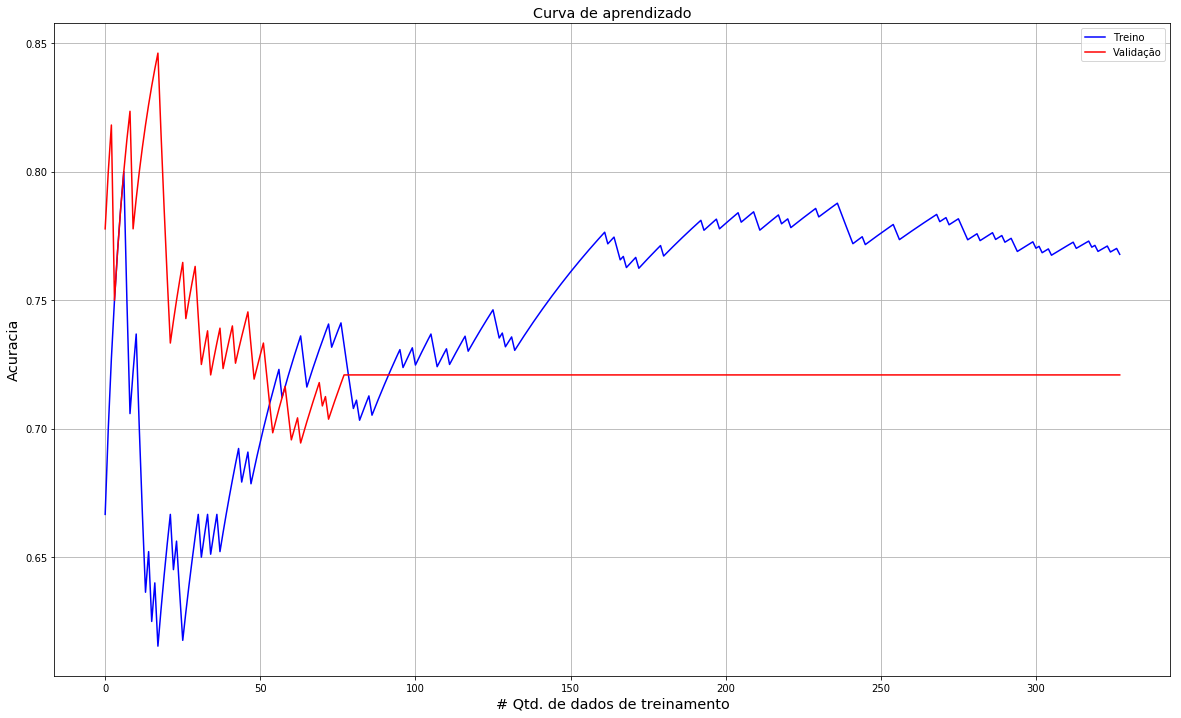

In [10]:


K = bestRegularization

def curva_aprendizado(X, Y, Xval, Yval):
    """
    Funcao usada gerar a curva de aprendizado.
  
    Parametros
    ----------
  
    X : matriz com os dados de treinamento
  
    Y : vetor com as classes dos dados de treinamento
  
    Xval : matriz com os dados de validação
  
    Yval : vetor com as classes dos dados de validação
  
    """

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []

    # inicializa o parametro de regularizacao da regressao logistica
    lambda_reg = 1
        
    # Configura o numero de interacaoes da regressao logistica
    iteracoes = 500
        
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instrucoes: Complete o codigo para gerar o gráfico da curva de aprendizado.
    #           Comece o treinamento com as primeiras 10 amostras da base de dados de 
    #           treinamento e calcule a acuracia do classificador tanto nos dados de
    #           treinamento já apresentados, quando na base de validacao. 
    #           Depois disso, adicione mais um dado para treinamento e calcule novamente 
    #           o desempenho. Continue adicionando um dado por vez ate todos os dados de 
    #           treinamento serem usados. Nas listas perf_train e perf_val, guarde a acuracia 
    #           obtida nos dados de treinamento e na base de validacao a cada nova adicao de 
    #           dados para treinamento.
    
    pVitoria = sum(Y==1)/len(Y) 
    pDerrota = sum(Y==0)/len(Y)
    
    ptrain, idx = knn(X, X, Y, K)
    pval, idx = knn(Xval, X, Y, K)
    for idx, i in enumerate(np.arange(9, len(X) - 1)):
        # Teste
        cm = util.get_confusionMatrix(Y[:i], ptrain[:i], [0,1])
        results = util.relatorioDesempenho(cm, [0,1])
        perf_train.append(results['acuracia'])
        # Validação
        cm = util.get_confusionMatrix(Yval[:i], pval[:i], [0,1])
        results = util.relatorioDesempenho(cm, [0,1])
        perf_val.append(results['acuracia'])
    
    ##################################################################################
       
    # Define o tamanho da figura 
    plt.figure(figsize=(20,12))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'Acuracia',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado(X_train_v, Y_train_v, X_val, Y_val)